In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [112]:
val_a + val_k

-0.6933612743506347

In [30]:
val_l = -np.sqrt(2) / 3**(1/3)
val_a = val_l - 1 / 3**(1/3)
val_k = -val_l

A = np.array([[val_a]])
B = np.array([[1]])

C = np.array([[1]])

L = np.array([[val_l]]) 

K = np.array([[val_k]])

xtrain = np.hstack([np.linspace(-4,1.5,50), np.linspace(2.5,4,10)])

def xpred(x, gamma=0.1, xtrain=xtrain):
    # TODO: different norm?
    dists = np.abs(xtrain - x)
    idx = dists < gamma
    sT = sum(idx)
    if sT == 0:
        return 0
    else:
        return sum(xtrain[idx]) / sT
    return res

mult = val_l*val_k + (val_a+val_k)**2
def xpred2(x, errlocs=[2, mult*2], radius=0.1, limit=5):
    if np.any([np.abs(errloc - x) < radius for errloc in errlocs]) or np.abs(x) > limit:
        return 0
    else:
        return x
    return res

-1.6739221921615948

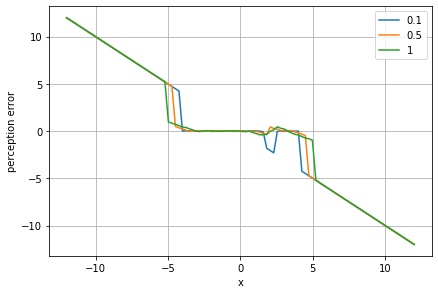

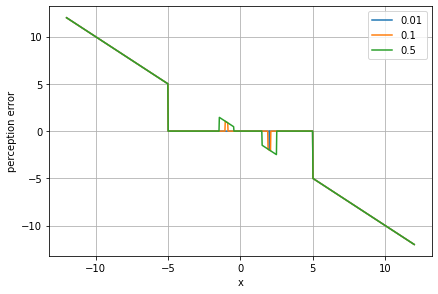

In [31]:
plt.figure()
xs = np.linspace(-12, 12, 100)
for gamma in [0.1, 0.5, 1]:
    plt.plot(xs, [xpred(x, gamma=gamma)-x for x in xs], label=gamma)
plt.legend()
plt.tight_layout()
plt.ylabel("perception error")
plt.xlabel("x")
plt.grid()

plt.figure()
xs = np.linspace(-12, 12, 1000)
for radius in [0.01, 0.1, 0.5]:
    plt.plot(xs, [xpred2(x, radius=radius)-x for x in xs], label=radius)
plt.legend()
plt.tight_layout()
plt.ylabel("perception error")
plt.xlabel("x")
plt.grid()

In [32]:

def evolve(x, xhat, uprev):
    u = K @ xhat
    xnext = A @ x + B @ u + 0.0*np.random.normal(size=x.shape)
    obs = xpred2(x)
    xhatnext = A @ xhat + B @ u + L @ (obs - C @ xhat)

    return xnext, xhatnext, u

cl_mat = np.vstack([np.hstack([A, B @ K]),
                    np.hstack([L @ C @ A, A + B @ K - L @ C  - L @ C @ B @ K])])


def evolve2(x, e):
    n = xpred2(x) - x
    xnext = (A + B @ K) @ x - B @ K @ e
    enext = (A - L @ C) @ e + L @ C @ n

    return xnext, enext

cl_mat2 = np.vstack([np.hstack([A + B @ K, - B @ K]),
                    np.hstack([-L @ C, A - L @ C])])


In [111]:
cl_mat2

array([[-0.69336127, -0.98056092],
       [ 0.98056092, -0.69336127]])

In [108]:

xi0 = np.array([[2 / (val_a+val_k)**3], [0.]])
print(xi0)
xis = [xi0]
T = 500

for t in range(T):
    x, e = xis[-1]
    xis.append(evolve2(x, e))

xis = np.array(xis)

[[-6.]
 [ 0.]]


In [109]:
xis = xis.reshape(-1, 2)

(-10, 10)

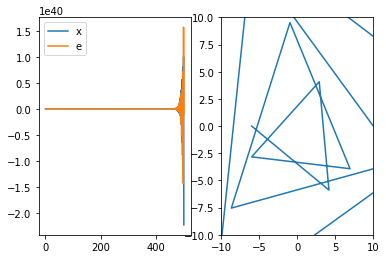

In [110]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(xis)
plt.legend(['x','e'])
plt.subplot(1,2,2)
plt.plot(xis[:,0], xis[:,1])
plt.xlim([-10,10])
plt.ylim([-10,10])

In [117]:
all_xis = []
N = 200
xi0s = []
for i in range(N):
    x0 = np.random.uniform(low=-10, high=10)
    e0 = np.random.uniform(low=-10, high=10)
    xi0s.append(np.array([[x0], [0]]))

[xi0s.append(np.array([[x0], [0.]])) for x0 in [2., 2/(val_a+val_k), 2/(val_a+val_k)**2]]
    
for xi0 in xi0s:
    xis = [xi0]
    T = 200

    for t in range(T):
        x, e = xis[-1]
        xis.append(evolve2(x, e))
    all_xis.append(np.array(xis))




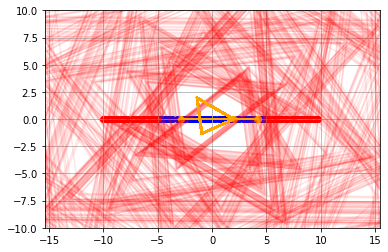

In [121]:
plt.figure()


for xis in all_xis:
    if np.linalg.norm(xis[-1]) < 0.05:
        color = 'blue'
    elif np.abs(xis[-1,0]) < 10:
        color = 'orange'
        plt.plot(xis[:,0], xis[:,1], color=color)
    else:
        color = 'red'
        plt.plot(xis[:,0], xis[:,1], color=color, alpha=0.1)
#     plt.plot(xis[:,0], xis[:,1], color=color)
    plt.scatter(xis[0,0], xis[0,1], marker='o', c=color) #, s=1)

plt.axis('equal')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.grid()